In [1]:
##11.2 搭建基础交易框架，test逻辑回归
##11.3 模块化与参数化，增加鲁棒性，bug fix

In [2]:
import pandas as pd
data = pd.read_excel("data.xlsx", sheet_name = 0)

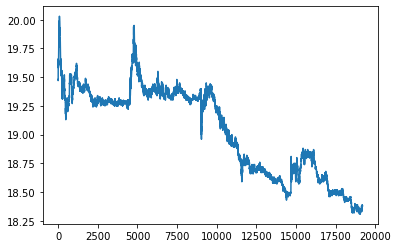

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(data["price"]) ## 画一下价格
plt.show()

In [4]:
## 处理一下买卖价量，由于题目给的是字符型，用literal_eval函数转换
from ast import literal_eval
import numpy as np
bid_price_list = []
bid_volume_list = []
ask_price_list = []
ask_volume_list = []
for i in range(len(data)):
    temp = (literal_eval(data.iloc[i]["bid_price"]))
    for j in range(len(temp)):
        temp[j] = round(temp[j],2)
    bid_price_list.append(temp)
    
    temp = (literal_eval(data.iloc[i]["ask_price"]))
    for j in range(len(temp)):
        temp[j] = round(temp[j],2)
    ask_price_list.append(temp)
    
    temp = (literal_eval(data.iloc[i]["bid_volume"]))
    for j in range(len(temp)):
        temp[j] = round(temp[j],0)
    bid_volume_list.append(temp)
    
    temp = (literal_eval(data.iloc[i]["ask_volume"]))
    for j in range(len(temp)):
        temp[j] = round(temp[j],0)
    ask_volume_list.append(temp)

temp1 = []
temp2 = []
for i in range(len(ask_volume_list)):
    temp1.append(sum(ask_volume_list[i]))
    temp2.append(sum(bid_volume_list[i]))
data["total_ask"] = temp1
data["total_bid"] = temp2

In [5]:
print(bid_price_list[0])
print(bid_volume_list[0])
print(ask_price_list[0])
print(ask_volume_list[0])

[19.47, 19.46, 19.45, 19.44, 19.43]
[1, 446, 58, 564, 28]
[19.48, 19.49, 19.5, 19.51, 19.52]
[460, 14, 511, 9, 243]


In [6]:
volume_tick = data["volume_tick"]
stock_price = data["price"]

In [7]:
trend = data["trend"]

ValueError: Length of values does not match length of index

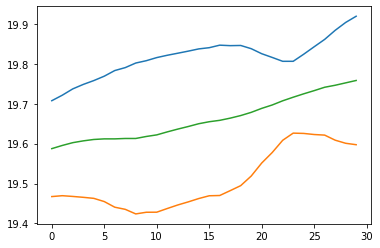

In [109]:
###接下来想办法判断time+1是上涨还是下跌，如果是上涨即不买入，下跌即买入。
###价格预测
volume_tick_x = np.array(volume_tick.iloc[0:4485]).reshape(-1, 1)
trend_x = np.array(trend.iloc[0:4485]).reshape(-1, 1)
rise_y = np.array(data["change_rate"].iloc[0:4485]).reshape(-1, 1)
X = data[["last_v","amount_tick"]].iloc[0:4485]

def add_price(X, length):
    X["ask_1"] = np.array(ask_volume_list).T[0][0:length]
    X["ask_2"] = np.array(ask_volume_list).T[1][0:length]
    X["ask_3"] = np.array(ask_volume_list).T[2][0:length]
    X["ask_4"] = np.array(ask_volume_list).T[3][0:length]
    X["ask_5"] = np.array(ask_volume_list).T[4][0:length]
    X["bid_1"] = np.array(bid_volume_list).T[0][0:length]
    X["bid_2"] = np.array(bid_volume_list).T[1][0:length]
    X["bid_3"] = np.array(bid_volume_list).T[2][0:length]
    X["bid_4"] = np.array(bid_volume_list).T[3][0:length]
    X["bid_5"] = np.array(bid_volume_list).T[4][0:length]
    
    X["ask_p1"] = np.array(ask_price_list).T[0][0:length]
    X["ask_p2"] = np.array(ask_price_list).T[1][0:length]
    X["ask_p3"] = np.array(ask_price_list).T[2][0:length]
    X["ask_p4"] = np.array(ask_price_list).T[3][0:length]
    X["ask_p5"] = np.array(ask_price_list).T[4][0:length]
    X["bid_p1"] = np.array(bid_price_list).T[0][0:length]
    X["bid_p2"] = np.array(bid_price_list).T[1][0:length]
    X["bid_p3"] = np.array(bid_price_list).T[2][0:length]
    X["bid_p4"] = np.array(bid_price_list).T[3][0:length]
    X["bid_p5"] = np.array(bid_price_list).T[4][0:length]### 把买卖1-5分离
add_price(data, len(data["price"]))
add_price(X, 4485)

def bull(X, length):
    ma = [0 for i in range(20)]
    up = [0 for i in range(20)]
    down = [0 for i in range(20)]
    for i in range(20, len(X)-20):
        temp_std = 0
        ma.append(sum(data['price'].iloc[i-20:i]) / 20)
        for j in range(20):
            temp_std += (data['price'].iloc[i+j]-ma[i])**2
        up.append(ma[i]+(temp_std)/20**0.5*2)
        down.append(ma[i]-(temp_std)/20**0.5*2)
    plt.plot(up[20:50])
    plt.plot(down[20:50])
    plt.plot(ma[20:50])
    X["up"] = up[:length]
    X["mid"] = ma[:length]
    X["down"] = down[:length]
    
bull(X,len(X))
bull(data,len(data))


In [103]:
#####one time only!
flag1 = False
if not flag1:
    X = X[20:]
    rise_y = rise_y[20:]
    flag1 = True
    #print(len(rise_y))
    #print(len(X))
X

,last_v,amount_tick,ask_1,ask_2,ask_3,ask_4,ask_5,bid_1,bid_2,bid_3,...,ask_p4,ask_p5,bid_p1,bid_p2,bid_p3,bid_p4,bid_p5,up,mid,down
20,1831,14553.239548,410,274,646,63,66,95,36,123,...,19.71,19.72,19.64,19.63,19.62,19.61,19.60,19.707744,19.5875,19.467256
21,741,9157.870285,14,3,372,40,7,66,188,162,...,19.66,19.67,19.62,19.61,19.60,19.59,19.58,19.721553,19.5955,19.469447
22,467,15236.970474,1,4,113,56,311,145,45,32,...,19.64,19.65,19.60,19.59,19.58,19.57,19.56,19.737412,19.6025,19.467588
23,777,13609.340424,6,141,365,40,6,9,106,52,...,19.66,19.67,19.61,19.60,19.59,19.58,19.57,19.748614,19.6070,19.465386
24,694,11281.500483,188,159,40,13,107,19,6,120,...,19.67,19.68,19.63,19.62,19.61,19.60,19.59,19.758216,19.6105,19.462784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480,41,5944.399765,172,298,256,298,109,104,1527,508,...,19.33,19.34,19.29,19.28,19.27,19.26,19.25,19.293492,19.2930,19.292508
4481,308,9572.799622,146,308,256,298,109,1217,505,471,...,19.33,19.34,19.28,19.27,19.26,19.25,19.24,19.293941,19.2935,19.293060
4482,496,578.400021,182,300,246,298,109,1167,505,471,...,19.33,19.34,19.28,19.27,19.26,19.25,19.24,19.294394,19.2940,19.293607
4483,30,1331.699947,12,104,0,0,0,12,0,0,...,0.00,0.00,19.30,0.00,0.00,0.00,0.00,19.294322,19.2940,19.293678


In [104]:
###混淆矩阵，傻逼sklearn这个功能都没有
def s_mat(temp_predict,rise_y):
    ans_1 = 0
    ans_0 = 0
    count_1 = 0
    count_0 = 0
    for i in range(len(temp_predict)):
        if temp_predict[i] == rise_y[i] and rise_y[i] == 1 :
            ans_1 += 1
        if temp_predict[i] == rise_y[i] and rise_y[i] == 0 :
            ans_0 += 1 
        if rise_y[i] == 1:
            count_1 += 1
        if rise_y[i] == 0:
            count_0 += 1
    print("real:        0 ,             1")
    print("predict")
    print("0     ", ans_0/count_0, 1 - ans_1/count_1)
    print("1     ", 1 - ans_0/count_0, ans_1/count_1)


1.0


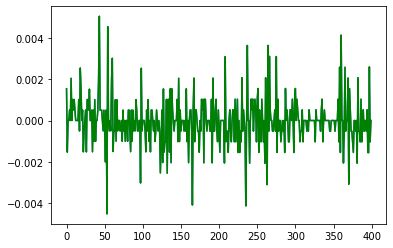

In [105]:
## 基于sklearn 库的一堆模型试验
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLarsCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#sca = StandardScaler()
#sca.fit(X)
#X = sca.transform(X) ##标准化，试过了标准化不影响结果
#print(X)
#rus = RandomUnderSampler(random_state=0)
#X, rise_y = rus.fit_resample(X, rise_y)

#model = RidgeClassifierCV(class_weight = {1:0.4,0:0.6})

#model = LogisticRegression()
#model = LinearRegression()
#model = LassoLarsCV()
#model = MLPRegressor(activation = 'tanh', alpha = 0.01, max_iter = 5000, verbose = True, hidden_layer_sizes = (256,4),random_state=1,tol = 1e-7)
#model = DecisionTreeRegressor()
#model = RandomForestRegressor(oob_score = True,verbose=3,n_estimators=200)
#model = LinearRegression()
#model = SVR()


model.fit(X, rise_y)
print(model.score(X, rise_y))
temp_predict = model.predict(X)
plt.plot(rise_y[:400])
plt.plot(temp_predict[:400], "g")
#s_mat(temp_predict, rise_y)
#print(model.coef_)

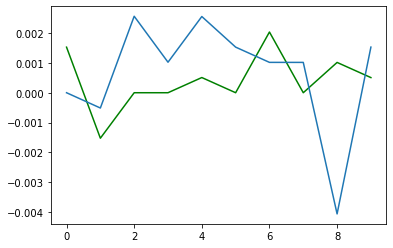

In [106]:
lists = model.predict(X)
plt.plot(lists[:10],"g")
plt.plot(data["change_rate"].iloc[:10])

In [101]:
def orgin_price(price_start, lists, stock_price, nums):
    predict_price = [price_start]
    for i in range(1,len(lists)):
        predict_price.append(predict_price[i-1]*(1+lists[i]))
    plt.plot(predict_price[:nums],"g")
    plt.plot(stock_price[:nums])
    plt.legend(["predict","real"])

In [99]:
time = 4505
test_x = data[["last_v","amount_tick","ask_1","ask_2","ask_3","ask_4"
                               ,"ask_5","bid_1","bid_2","bid_3","bid_4","bid_5","ask_p1","ask_p2","ask_p3","ask_p4"
                               ,"ask_p5","bid_p1","bid_p2","bid_p3","bid_p4","bid_p5"]].iloc[time:]
#sca.fit(test_x)
#test_x = sca.transform(test_x)

temp_test = model.predict(test_x)


temp_price = list(data["change_rate"].iloc[time:])

#plt.plot(range(50),data["change_rate"].iloc[time:time+50], "g")
#plt.plot(range(50),temp_test[:50])
#plt.plot(to_1[:50])
#plt.plot(to_2[:50])
#print(temp_price[0])
orgin_price(temp_price[0],temp_test, temp_price,30)
#plt.plot(temp_test)
#plt.plot()

ValueError: Number of features of the model must match the input. Model n_features is 25 and input n_features is 22 

In [ ]:
## 利用模型预测
time = 4505 ## 24号的time tick, 23号用作训练集
fre = 500
predict = model.predict(data[["last_v","total_ask", "total_bid","amount_tick","ask_1","ask_2","ask_3","ask_4"
                               ,"ask_5","bid_1","bid_2","bid_3","bid_4","bid_5"]].iloc[time:])
flag_list = []
predict = list(predict.T[0])
for i in range(0,14000, fre):
    k = predict[i:i+fre].index(max(predict[i:i+fre])) + i
    for j in range(fre):
        if j + i == k:
            flag_list.append(1)
        else:
            flag_list.append(0)

c = order_in_buy_one(time, flag_list)
plt.plot(range(len(c)),c)
plt.show()

In [15]:
####Lstm回归


import torch
rise_y = np.array(data["price"].iloc[:4485])
data_X, data_Y = X , rise_y
train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X = np.array(data_X[:train_size])
train_Y = np.array(data_Y[:train_size])
test_X = np.array(data_X[train_size:])
test_Y = np.array(data_Y[train_size:])

train_X = train_X.reshape(-1, 1, 12)
train_Y = train_Y.reshape(-1, 1, 1)
test_X = test_X.reshape(-1, 1, 12)

train_x = torch.from_numpy(train_X)
train_y = torch.from_numpy(train_Y)
test_x = torch.from_numpy(test_X)

train_x = train_x.float()
train_y = train_y.float()

ValueError: cannot reshape array of size 78125 into shape (1,12)

In [ ]:
from torch import nn
from torch.autograd import Variable

class lstm(nn.Module):
    def __init__(self,input_size=12,hidden_size=40,output_size=1,num_layer=5):
        super(lstm,self).__init__()
        self.layer1 = nn.LSTM(input_size,hidden_size,num_layer)
        
        self.layer2 = nn.Linear(hidden_size,output_size)
        
    def forward(self,x):
        x,_ = self.layer1(x)
        s,b,h = x.size()
        x = x.view(s*b,h)
        
        x = self.layer2(x)
        x = x.view(s,b,-1)
        
        return x

model = lstm(12,128,1,2)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
# 开始训练
for e in range(15):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
    # 前向传播
    var_x = torch.tensor(var_x, dtype=torch.float32)
    out = model(var_x)
    loss = criterion(out, var_y)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (e + 1) % 1 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(e + 1, loss.item()))

In [ ]:


model = model.eval() # 转换成测试模式
data_X = np.array(data_X)
data_X = data_X.reshape(-1, 1, 12)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
var_data = torch.tensor(var_data, dtype=torch.float32)
pred_test = model(var_data) # 测试集的预测结果
# 改变输出的格式
pred_test = pred_test.view(-1).data.numpy()
# 画出实际结果和预测的结果
print(len(pred_test))
real_test = data["price"].iloc[:4485]

temp = [0]
temp.append(real_test)


plt.plot(pred_test[10:100], 'r', label='prediction')
plt.plot(real_test[10:100], 'b', label='real')
plt.legend(loc='best')

ans = 0
for i in range(4484):
    if pred_test[i]*real_test[i] > 0:
        ans += 1
print(ans/4485)

In [ ]:
orgin_price(temp_price[0],pred_test,temp_price)

In [ ]:
########################################################################################

In [ ]:
print(calc_vwap(data_min))

In [ ]:
## baseline 从0时刻开始，每隔6秒（两个tick， which is quite 傻逼）把买一买掉 
cu = order_in_buy_one(4505, [1 for _ in range(0,20000,2)])
plt.plot(range(len(cu)), cu)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

In [110]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from keras

sca = StandardScaler()
sca.fit(X)
X = sca.transform(X) ##标准化，试过了标准化不影响结果
rise_y = np.array(data["change_rate"].iloc[0:4485]).reshape(-1, 1)
#rise_y = np.array(data["volume_tick"].iloc[0:4485]).reshape(-1, 1)
rise_y = rise_y[20:]

data_X, data_Y = X , rise_y
train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

train_X = np.array(train_X)
test_X = np.array(test_X)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(len(data_X))
print(len(data_Y))

# 设计模型
model = Sequential()




model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1))
#Adamax = optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mae', optimizer='Adam')
# 拟合模型
history = model.fit(train_X, train_Y, epochs=170, batch_size=74, validation_data=(test_X, test_Y), 
                    verbose=2, shuffle=False)
# 绘制损失趋势线
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

4485
4465


NameError: name 'Dropout' is not defined

array([[[ 3.28364308,  1.02494677, -0.02580318, -0.23836461,
          1.0887218 , -0.63112955, -0.63808843, -0.5190452 ,
         -0.7743425 , -0.69358921, -0.68430736, -0.72335392,
          2.36416465,  0.77066192,  0.76990329,  0.76931027,
          0.76876814,  2.40085307,  0.70848368,  0.70924595,
          0.70978926,  0.71036346,  2.48093322,  1.90498145,
          1.11212831]],

       [[ 1.0111636 ,  0.44815119, -0.80035859, -0.97286976,
          0.27472724, -0.69791579, -0.77757695, -0.57761935,
         -0.54605791, -0.63685639, -0.92753894, -0.90406416,
          2.20207644,  0.65385612,  0.6531562 ,  0.65261902,
          0.65213138,  2.23714562,  0.66162816,  0.66236155,
          0.66287867,  0.66342604,  2.58066342,  1.97017869,
          1.13178062]]])

3125
Test RMSE: 0.000668600
Baseline RMSE: 0.001064711


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


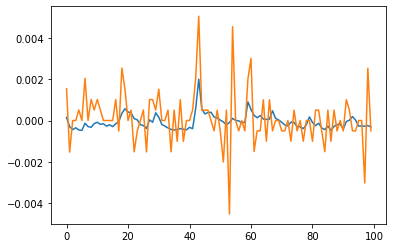

In [84]:
#plot_y = train_Y.T[0][0]

yhat = model.predict(train_X)
yhat = yhat[:,0]
print(len(yhat))
test_yhat = model.predict(test_X)
#plt.plot(yhat[:30],"r")
#plt.plot(train_Y[:30],"g")
rmse = mean_squared_error(train_Y, yhat)**0.5
print('Test RMSE: %.9f' % rmse)

ty = [0]
for i in range(len(train_Y)):
    ty.append(train_Y[i])
ty.pop(-1)
print('Baseline RMSE: %.9f' % mean_squared_error(train_Y, ty)**0.5)
plt.plot(yhat[:100])
plt.plot(rise_y[:100])
#plt.hist(yhat)
#plt.hist(rise_y)

In [46]:
def orgin_price(price_start, lists, stock_price, nums):
    predict_price = [price_start]
    for i in range(1,len(lists)):
        predict_price.append(predict_price[i-1]*(1+lists[i]))
    
    plt.plot(range(nums),predict_price[:nums],"g")
    plt.plot(range(nums),stock_price[:nums])
    plt.legend(["predict","real"])


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


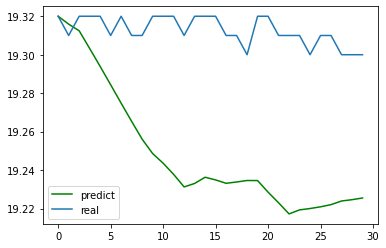

In [51]:

starttime = 3210
orgin_price(data["price"].iloc[starttime],test_yhat[starttime-3125:],stock_price[starttime:],30)

In [ ]:
######################################################################################################################

In [70]:
### 买一交易函数，可以封装。（第三题用）
## time:交易开始时间，tick
## flag:交易信号序列，1为买入，0为不买入，长度应为19186-time

def mul(list1,list2,nums):
    summ = 0
    for i in range(nums):
        summ += list1[i]*list2[i] ## 列表元素相乘函数
    return summ*0.9


def order_in_buy_one(time, flag, weight):
    own = 40000 #持有手数
    sold = 0 # 卖出收益
    i = 0
    time_start = time
    min_price = 99999
    sold_curve = []
    buy_nums = 1
    fre = 1
    sold_tick = 0
    
    while own > 0:
        if time >=19180 or i>=len(flag) or sold_tick >= 100:
            break
        if flag[i]==1 and time % fre == 0:
            if ask_volume_list[time][0] <= own:
                sold += mul(ask_volume_list[time],ask_price_list[time],buy_nums)*100*weight[i] ## 买1的90%
                own -= sum(ask_volume_list[time][0:buy_nums])*0.9*weight[i]
                sold_curve.append(mul(ask_volume_list[time],ask_price_list[time],buy_nums)*100*weight[i])
                sold_tick += 1
            else:
                sold += own*ask_price_list[time][0]*100
                own = 0
                sold_tick += 1
                break
            if ask_price_list[time][buy_nums]<= min_price:
                min_price = ask_price_list[time][buy_nums]
        else:
            sold_curve.append(0)
        time += 1
        i += 1
    if own > 0:
        print("However,",own,"stocks had not been sold yet, which will be sold in", min_price)
        sold += own*min_price*100
    print("All stocks were sold in", sold_tick,"ticks")
    print("Total income:"+ str(sold))
    print("Average price:"+ str(sold/40000/100))
    print("Max price in the period:", max(stock_price[time_start:]))
    print("Average price in the period:",sum(stock_price[time_start:])/len(stock_price[time_start:]))
    print("Min price in the period:", min(stock_price[time_start:]))
    return sold_curve


In [65]:
# calculate vwap value
def calc_vwap(marketDataTable, t):
    n = len(marketDataTable) - 1
    total_sum = 0.0
    volume_sum = 0
    for i in range(1, n):
        high_price = float(marketDataTable["highPrice"].iloc[i])
        low_price = float(marketDataTable["lowPrice"].iloc[i])
        price = (high_price + low_price) / 2
        volume = int(marketDataTable["total_vo"].iloc[i])
        total_sum += price * volume
        volume_sum += volume

    return total_sum / volume_sum



41969
33771


(array([17.,  5., 15.,  6.,  7.,  4.,  1.,  2.,  0.,  2.]),
 array([ 3299. ,  6346.2,  9393.4, 12440.6, 15487.8, 18535. , 21582.2,
        24629.4, 27676.6, 30723.8, 33771. ]),
 <a list of 10 Patch objects>)

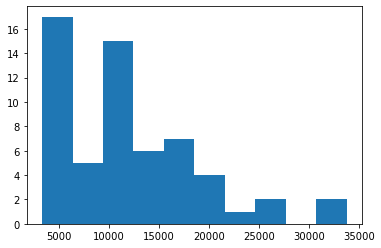

In [18]:
total_vo = []
total_mo = []
openPrice = []
closePrice = []
highPrice = []
lowPrice = []

for i in range(0,len(data)-20,20):
    total_vo.append(sum(data["volume_tick"].iloc[i:i+20]))
    total_mo.append(sum(data["amount_tick"].iloc[i:i+20]))
    openPrice.append(data['price'].iloc[i])
    closePrice.append(data['price'].iloc[i+20])
    highPrice.append(max(data["price"].iloc[i:i+20]))
    lowPrice.append(min(data["price"].iloc[i:i+20]))

data_min = pd.DataFrame({"total_vo":total_vo,"total_mo":total_mo,"openPrice":openPrice,"closePrice":closePrice
                        ,"highPrice":highPrice,"lowPrice":lowPrice})

#calc_vwap(data_min, 0)
vo = data_min["total_vo"]
vo_2day = list(vo)
vo_2day = vo_2day[:60]
print(vo_2day.pop(vo_2day.index(max(vo_2day))))
print(max(vo_2day))
plt.hist(vo_2day)

In [19]:
vwap_list = []
for i in range(len(data_min)-20):
    now_vwap = calc_vwap(data_min, i)
    vwap_list.append(calc_vwap(data_min, i))

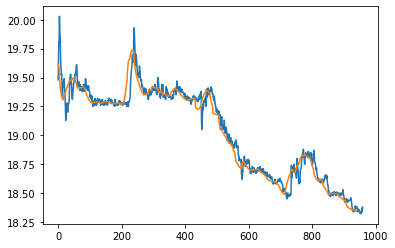

In [20]:
#vwap_day = calc_vwap(data_min)
plt.plot(data_min["openPrice"])
#plt.plot([vwap_day for i in range(len(data_min["openPrice"]))])
plt.plot(vwap_list)

In [94]:
order_flag = []

for i in range(600, len(data_min)):
    for j in range(19):
        order_flag.append(0)
    if data_min["total_vo"].iloc[i] > 3000:
        order_flag.append(1)
    else:
        order_flag.append(0)

weight_list = []
for i in range(2, len(order_flag)):
    print(i)
    temp = model.predict(train_X[i-2:i])
    temp = temp[:,0]
    temp_value = temp[0]+temp[1]
    temp_value = temp_value[0]
    if temp_value > 0 and order_flag[i] == 1:
        weight_list.append(1.2)
    elif temp_value < 0 and order_flag[i] == 1:
        weight_list.append(0.8)
    else:
        weight_list.append(0)
        
        

sold_record = order_in_buy_one(12800, order_flag,weight_list)
print("VWAP is:", calc_vwap(data_min[600:],len(data_min[600:]-21)))
plt.plot(sold_record)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


IndexError: index 1 is out of bounds for axis 0 with size 1

7180
